Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Mean Squared Error (MSE): 8850353.497353457
Root Mean Squared Error (RMSE): 2974.954368953154
R-squared: 0.8113486281906064


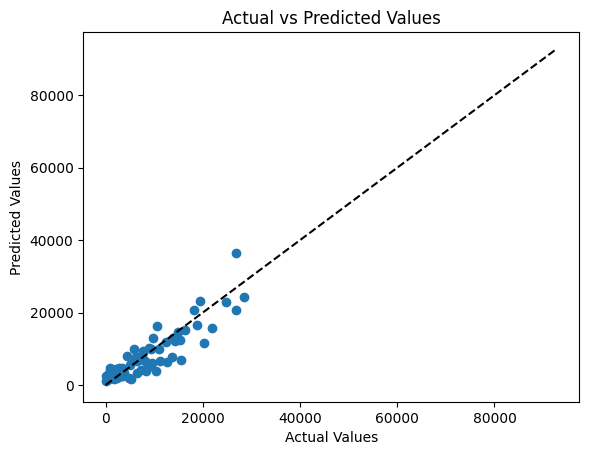

                  Coefficient
Channel            473.398063
Region               9.362351
Fresh                0.034332
Milk                 0.159123
Frozen               0.046854
Detergents_Paper     1.662763
Delicassen           0.244762


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('customers.csv')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Select features (independent variables) and target (dependent variable)
# Assuming 'Grocery' is the target variable, and other columns are the features
X = df.drop(columns=['Grocery'])  # Drop the target variable
y = df['Grocery']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multiple Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Optional: Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
